<a href="https://colab.research.google.com/github/rezendervp/chemical-engineering/blob/main/Advection_wave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Co = 0.10000000000000002


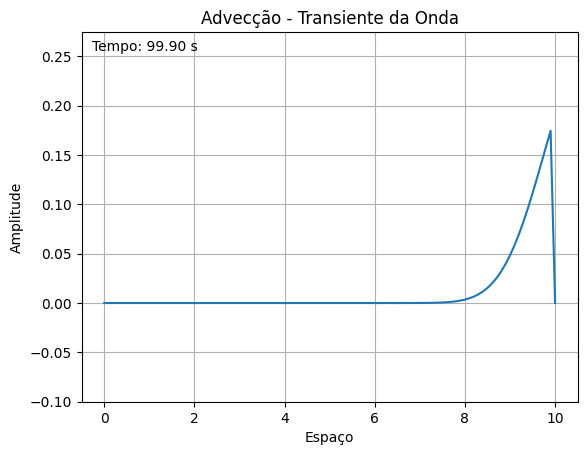

In [ ]:
# ∂u/∂t + c ∂u/∂x = 0
# FDM com UDS

# Importa as bibliotecas necessárias.
from IPython import get_ipython
from IPython.display import display
# %%
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Parâmetros

# Define os parâmetros da simulação.
# L: Comprimento do domínio espacial.
# nx: Número de pontos na grade espacial.
# dx: Tamanho do passo espacial.
# nt: Número de passos de tempo.
# dt: Tamanho do passo de tempo.
# u: Velocidade de propagação da onda.
# A: Amplitude da onda.
L = 10
nx = 101
dx = L / (nx - 1)
dt = .1
nt = 1000
u = 0.1
A = 1

# Calcula o número de Courant.

Co = u*dt/dx

print(  "Co = " + str(Co))

# Verifica a condição de estabilidade de Courant-Friedrichs-Lewy (CFL).
# Se o número de Courant for maior que 1, a simulação pode ser instável.
# O usuário pode optar por continuar mesmo assim para fins didáticos.
if Co > 1:
    resposta = input("O número de Courant (Co) é maior que 1, o que pode levar a instabilidade. Deseja continuar mesmo assim? (s/n): ")
    if resposta.lower() != 's':
        print("Interrompendo a execução.")
        exit()  # ou raise SystemExit
    else:
        print("Prosseguindo com Co > 1 para fins didáticos.")

# Define as coordenadas espaciais.
x = np.linspace(0, L, nx)

# Define a função que gera a condição inicial da onda.
# A condição inicial é uma onda quadrada com amplitude A entre 0.5 e 1.0.
def condicao_inicial():
    phi0 = np.zeros(nx)
    phi0[int(.5 / dx):int(1 / dx + 1)] = A
    return phi0

# Prepara a figura para a animação.
fig, ax = plt.subplots()
line, = ax.plot(x, condicao_inicial()) # Plota a condição inicial
ax.set_ylim(0, 1.2) # Define os limites do eixo y
ax.set_title("Advecção - Transiente da Onda") # Define o título do gráfico
ax.set_xlabel("Espaço") # Define o rótulo do eixo x
ax.set_ylabel("Amplitude") # Define o rótulo do eixo y
ax.grid(True) # Adiciona uma grade ao gráfico

# Define a função que atualiza a onda a cada frame da animação.
# A função usa o método de diferenças finitas para resolver a equação de advecção.

# Criar um objeto de texto para exibir o tempo
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)

""" A equação hiperbólica foi discretizada usando 3 abordagens:
    *UDS (1a ordem regressiva) - EStável com difusão numérica
    *CDS (2a ordem central) - totalmente instável para qualquer dt ou dx
    *Lax- Wendroff ( rregssiva de 2a ordem) - tende a deixar oscilaçòes para trás
    quem gradientes elevados como este degrau - é não dissipativa

   Basta comentar a equação que não quer usar, e descomentar a que quer usar.
    O resultado é visto em um GIF animado

    <<<<<- acesse no meniu do COLAB ao lado
"""



def update(frame):
    phi = condicao_inicial()
    for n in range(frame):  # simular até o tempo atual
        phin = phi.copy()
        for i in range(1, nx-1):
          #UDS
          #phi[i] = phin[i] - u * dt / dx * (phin[i] - phin[i - 1]
          phi[i] = phin[i] - u * dt / dx * (phin[i] - phin[i - 1])

          #CDS (incondicionalemnte instável)
          #phi[i] = phin[i] - u * dt / (2 * dx) * (phin[i + 1] - phin[i - 1])

          #Lax-Wendroff
          #phi[i] = (
          #           phin[i] - (u * dt / (2 * dx)) * (phin[i + 1] - phin[i - 1])
          #            + (u**2 * dt**2 / (2 * dx**2)) * (phin[i + 1] - 2 * phin[i] + phin[i - 1])
          #          )



    # Ajustar o limite vertical (y)
    ax.set_ylim(phi.min() - 0.1, phi.max() + 0.1)  # Adicionar margem de 0.1

    # Atualizar o texto com o tempo
    time_text.set_text(f'Tempo: {frame * dt:.2f} s')

    line.set_ydata(phi) # Atualiza os dados da linha no gráfico
    return line,


# Cria a animação usando FuncAnimation.
# frames: Número de frames da animação.
# blit: Otimização para renderizar apenas as partes que mudam.
ani = FuncAnimation(fig, update, frames=nt, blit=True)

# Salvar como GIF (ou mp4 com FFMpegWriter)
# Salva a animação como um GIF.
# fps: Frames por segundo.
ani.save('onda_adveccao.gif', writer=PillowWriter(fps=30))

# Exibe a animação.
#plt.show()

